In [2]:
from IPython.display import Audio 
from IPython.core.display import display
import torchaudio
import torch
import numpy as np
from utils.utils import *
from torch.utils.data import DataLoader,Dataset


In [3]:
mean=1.1805574317769665
std=37.99633470918632

### Loads generated specgan batches + preview

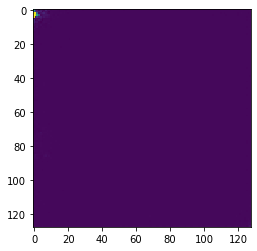

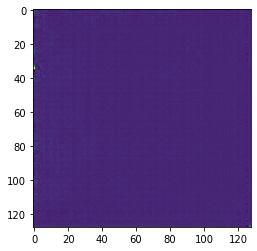

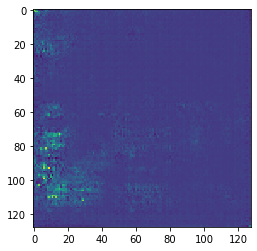

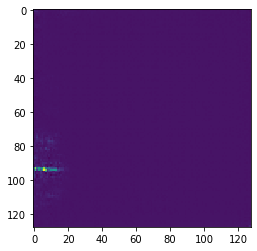

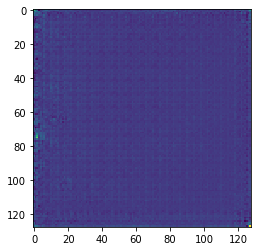

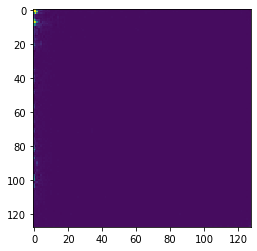

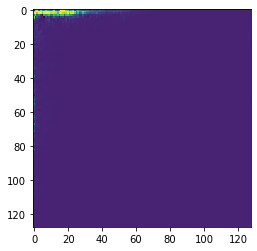

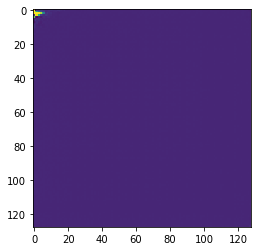

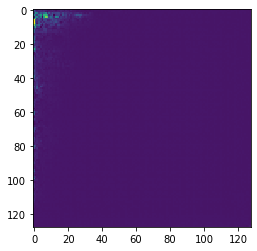

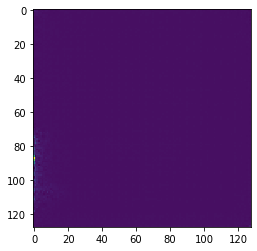

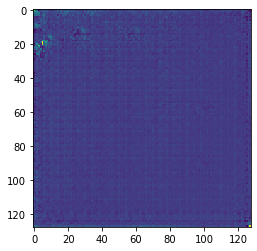

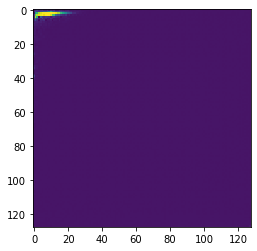

-2.6268232
115.06196
2.162798


-1.2043005
8.707514
0.11881322


-1.8024501
7.428041
0.45962518


-2.8643022
49.854443
1.0455394


-0.6917033
2.487688
0.08225078


-4.091875
114.42415
2.9519506


-12.958933
115.06273
7.3934836


-14.208748
115.06956
2.9706779


-7.283071
114.86364
3.4211025


-2.686791
58.031517
0.7976196


-0.72333145
2.5184503
0.096648544


-6.8335166
115.0125
4.6870184


In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
from torchaudio import transforms
griffinLim = transforms.GriffinLim(
        n_fft=255,
        win_length=255,
        hop_length=128)
  

def show_spectrograms(audio_batch):
    for i in range(audio_batch.shape[0]):
        plt.imshow(audio_batch[i][0].numpy(), interpolation='nearest')
        plt.show()

def listen_spectrograms(audio_batch,autoplay=False):
    for i in range(audio_batch.shape[0]):
        sound=audio_batch[i][0]
        print(np.min(sound.numpy()))
        print(np.max(sound.numpy()))
        print(np.std(sound.numpy()))
        #std=torch.std(sound)
        sound=torch.clip(sound, min=0)
        
        #v_min, v_max = sound.min(), sound.max()
        #new_min, new_max = 1e-10, 50
        #sound = (sound - v_min)/(v_max - v_min)*(new_max - new_min) + new_min
        sound=griffinLim(sound)
        display(Audio(sound, rate=16000, autoplay=autoplay))

test_path='./save/specfake/fake_220_25636.pt'
audio_batch=torch.load( test_path, map_location=torch.device('cpu'))
audio_batch = (audio_batch * (3 * std)) + mean -0.1


show_spectrograms(audio_batch)
listen_spectrograms(audio_batch)

### Loads generated Wavegan batches + preview

In [6]:
from IPython.display import Audio 
from IPython.core.display import display
import torchaudio
import torch
import numpy as np
SAMPLING_RATE=16000
def audio_player(audio_batch,autoplay=False):
    
    for i in range(audio_batch.shape[0]):
        display(Audio(audio_batch[i].numpy(), rate=SAMPLING_RATE, autoplay=autoplay))


epoch=str(12)
test_path='./save/wavefake/fake_676_30468.pt'
audio_batch=torch.load( test_path, map_location=torch.device('cpu'))
print(np.min(audio_batch.numpy()))
print(np.max(audio_batch.numpy()))
print(np.std(audio_batch.numpy()))

audio_player(audio_batch)



-0.32067114
0.43136516
0.04317257


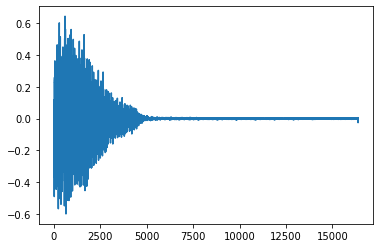

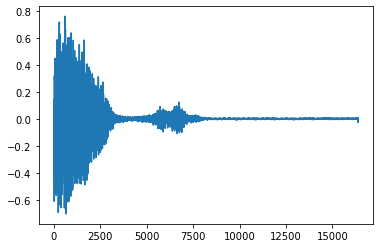

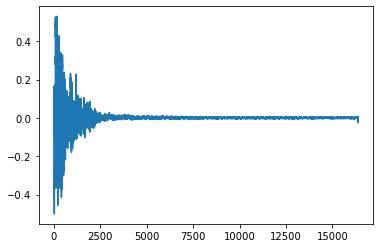

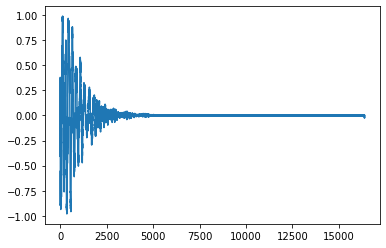

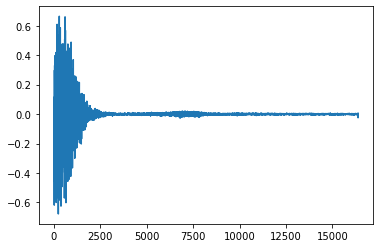

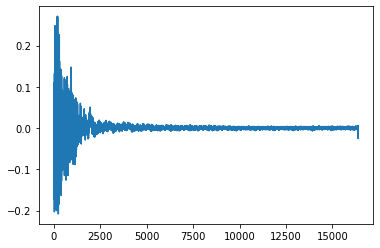

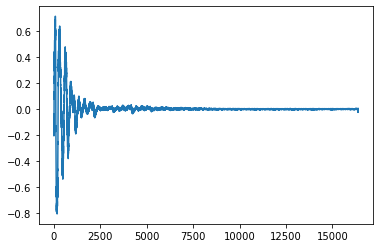

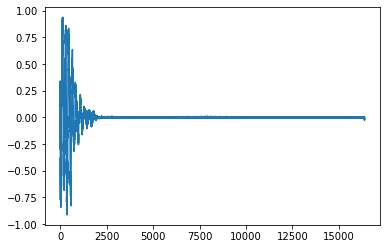

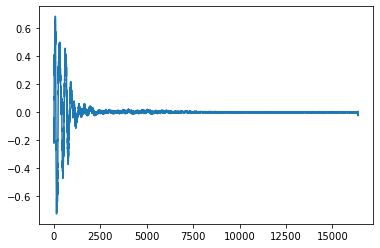

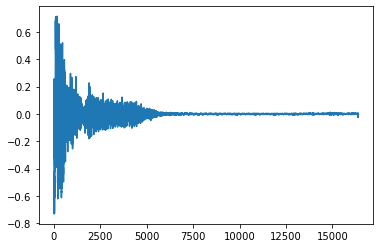

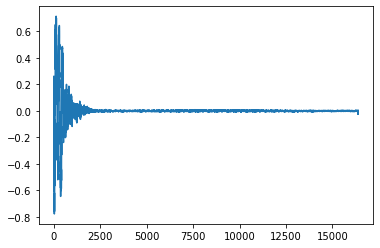

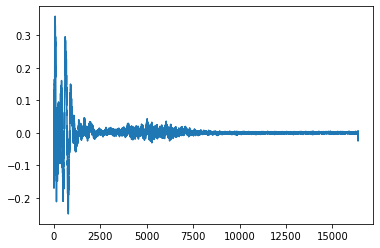

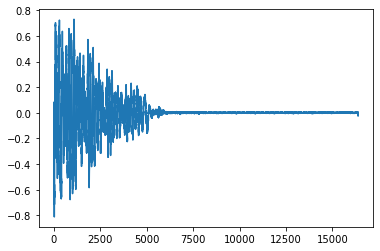

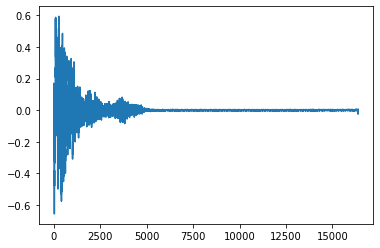

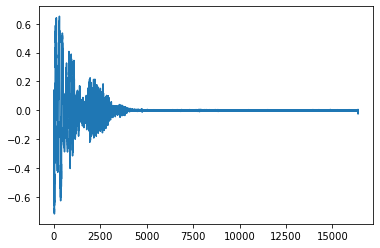

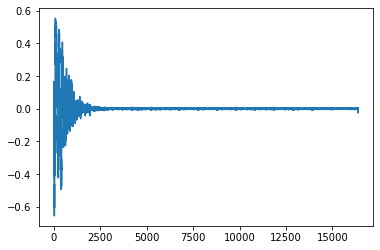

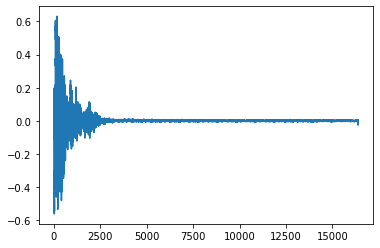

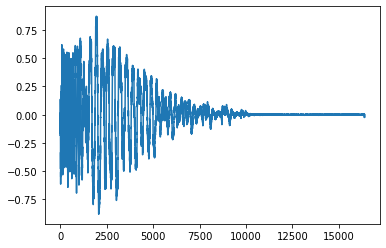

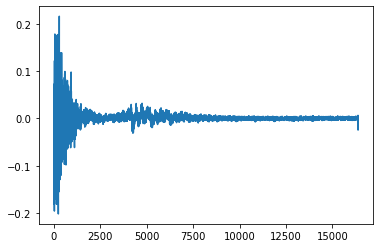

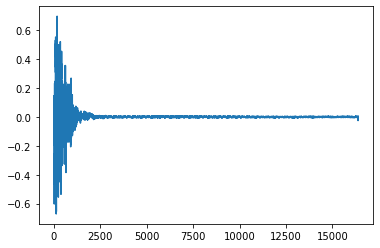

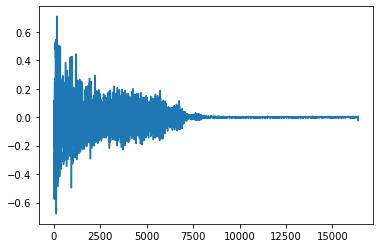

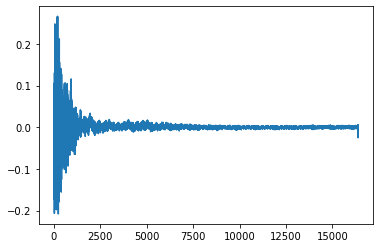

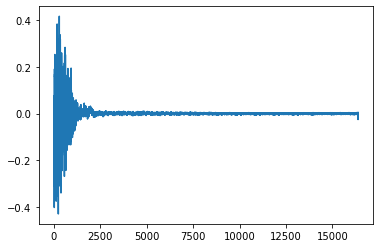

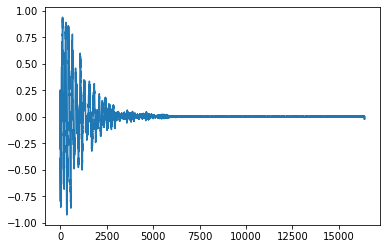

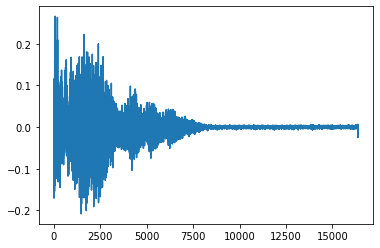

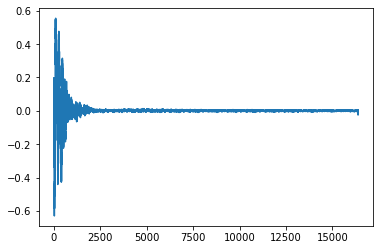

In [63]:
import matplotlib.pyplot as plt

for audio in audio_batch:
    plt.plot(audio[0])
    plt.show()